In [3]:
'''
=================================================
Milestone 1

Name  : Adriel Julius Sutanto
Batch : BSD-026

Analyzing the performance of employees' productivity in a company through a provided database using inferential statistics, descriptive statistics, as well as creating data visualization to better communicate the data results and findings using Tableau Public software.
=================================================
'''

"\n=================================================\nMilestone 1\n\nName  : Adriel Julius Sutanto\nBatch : BSD-026\n\nAnalyzing the performance of employees' productivity in a company through a provided database using inferential statistics, descriptive statistics, as well as creating data visualization to better communicate the data results and findings using Tableau Public software.\n=================================================\n"

Tableau Public Visualization for Educational Data:
https://public.tableau.com/app/profile/adriel8148/viz/Adriel-EducationalData/EducationalData

Tableau Public Visualization for Productivity Analysis:
https://public.tableau.com/app/profile/adriel8148/viz/Adriel-ProductivityAnalysis/ProductivityAnalysis

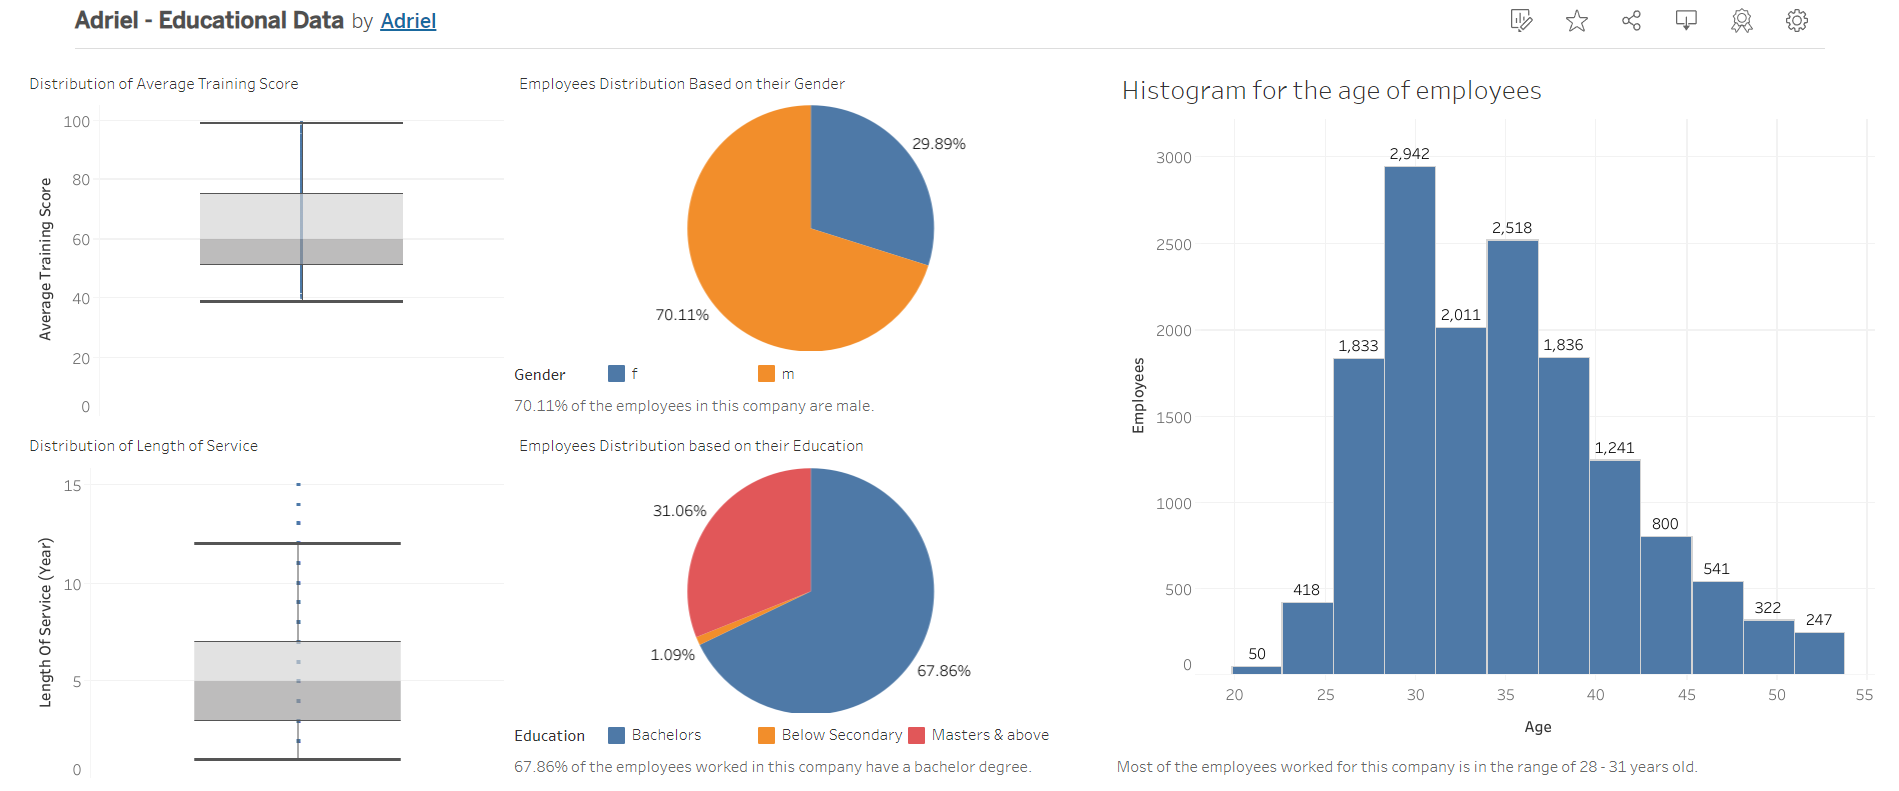

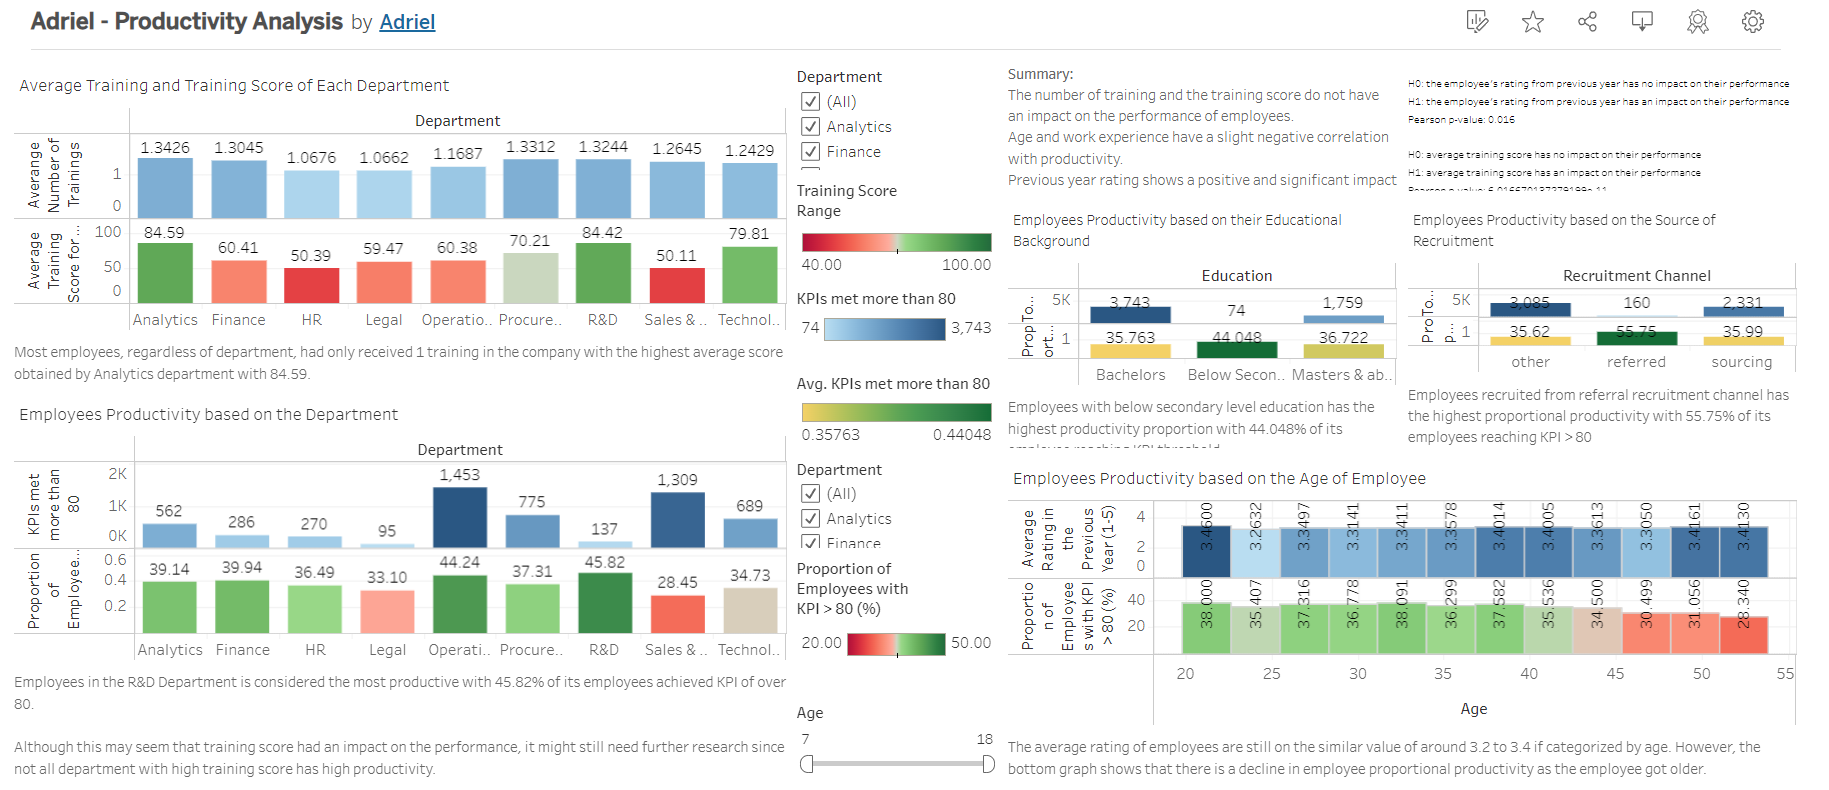

## Problem Statement
As a data analyst in a certain company, I am tasked by the HR Department of the company to track the performance of employees in this company as well as giving them insight on what should be done to increase the productivity of all employees. In addition to that, the company asked me to find which department is considered the most productive, determine which educational background has the highest productivity, as well as determine which recruitment channel of which the employees are recruited from has produced the most productive employees in the company.

S: Increasing the total productivity of the company

M: Increasing employees' productivity by 20%

A: To achieve this, there are several indicators that would be analyzed towards the ability of workers to achieve a certain point of KPI to track their current performance in the company.

R: By increasing the overall productivity of the company, employees would be able to provide more for the company and the company would be able to gain more profit.

T : This research has obtained data as well as continuous monitoring and observation on the employees for a year. 

Increasing the company's overall productivity by 20% by tracking the overall performance of employees for a year which then the data would be analyzed to gain insight on what should be done and improved by the company since it would allow employees to provide more for the company and the company benefitted to have more profit.

5W + 1H

What: What is the most impactful factor that may contribute to the employee's productivity?

Who: Which categories of employees has the highest productivity in the company?

Where: Which department has the highest employee productivity across all regions in the company?

Why: Why do KPI important in measuring the productivity of employees?

How: How do these factors influence the productivity?

SQL Query

In [4]:
# # creating a database called milestone1
# CREATE DATABASE milestone1

# # begin the transactional control language query
# BEGIN

# # create a table called performance with its columns listed below
# CREATE TABLE performance(
# 	id SERIAL PRIMARY KEY,
# 	employee_id int,
# 	department varchar(30),
# 	education varchar(30),
# 	gender varchar(5),
# 	recruitement_channel varchar(20),
# 	no_of_trainings int,
# 	age int,
# 	previous_year_rating float,
# 	length_of_service int,
# 	KPIs_met_more_than_80 int,
# 	avg_training_score int,
# 	age_no float,
# 	previous_year_rating_no float,
# 	length_of_service_no float,
# 	avg_training_score_no float
# )

# # copying the content from employee_performance_tracker.csv to table finances
# COPY employee_performance_tracker(employee_id, department, education, gender, recruitment_channel, no_of_trainings, age, previous_year_rating, length_of_service, KPIs_met_more_than_80, avg_training_score, age_no, previous_year_rating_no, length_of_service_no, avg_training_score_no)
# FROM 'C:\tmp\employee_performance_tracker.csv'
# DELIMITER ','
# CSV HEADER;

# # commit the changes
# COMMIT

### Data Cleaning

In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

In [2]:
# import the csv file using pandas
data = pd.read_csv('Uncleaned_employees_final_dataset (1).csv')
data

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,8724,Technology,region_26,Bachelors,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelors,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17412,64573,Technology,region_7,Bachelors,f,referred,2,30,5.0,6,1,0,81
17413,49584,HR,region_7,Bachelors,m,other,1,33,1.0,9,0,0,51
17414,49584,HR,region_7,Bachelors,m,other,1,33,1.0,9,0,0,51
17415,49584,HR,region_7,Bachelors,m,other,1,33,1.0,9,0,0,51


Employee’s Performance for HR Analytics. Retrieved from: https://www.kaggle.com/datasets/sanjanchaudhari/employees-performance-for-hr-analytics

In [7]:
# drop missing values from raw data
data1 = data.dropna()
data1

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
1,74430,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelors,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61
5,46232,Procurement,region_7,Bachelors,m,sourcing,1,36,3.0,2,0,0,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17412,64573,Technology,region_7,Bachelors,f,referred,2,30,5.0,6,1,0,81
17413,49584,HR,region_7,Bachelors,m,other,1,33,1.0,9,0,0,51
17414,49584,HR,region_7,Bachelors,m,other,1,33,1.0,9,0,0,51
17415,49584,HR,region_7,Bachelors,m,other,1,33,1.0,9,0,0,51


In [93]:
data1['no_of_trainings_no'].max()

9

In [8]:
# drop unused columns, in this case: awards won and region
data1 = data1.drop(columns=['awards_won', 'region'])

In [9]:
data1

,employee_id,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,avg_training_score
1,74430,HR,Bachelors,f,other,1,31,3.0,5,0,51
2,72255,Sales & Marketing,Bachelors,m,other,1,31,1.0,4,0,47
3,38562,Procurement,Bachelors,f,other,3,31,2.0,9,0,65
4,64486,Finance,Bachelors,m,sourcing,1,30,4.0,7,0,61
5,46232,Procurement,Bachelors,m,sourcing,1,36,3.0,2,0,68
...,...,...,...,...,...,...,...,...,...,...,...
17412,64573,Technology,Bachelors,f,referred,2,30,5.0,6,1,81
17413,49584,HR,Bachelors,m,other,1,33,1.0,9,0,51
17414,49584,HR,Bachelors,m,other,1,33,1.0,9,0,51
17415,49584,HR,Bachelors,m,other,1,33,1.0,9,0,51


### Variables Description:

Employee ID = a unique identifier for an employee

Department = the department of which that specific employee worked in

Region = the geographical region that the employee worked in

Education = educational background of the employee

Gender = the gender of an employee

Recruitment Channel = source of which the employee were employed

Number of training = the number of training an employee received in the company

Age = the age of an employee

Previous Year Rating = performance rating of an employee in the previous year

Length of Service = how long the employee has worked for the company

Awards won = the number of award an employee has achieved for the company

Average Training Score = the mean score of which the employee achieved during training

KPIs met more than 80 = the Key Performance Indicators that the employee achieved in this year

## Statistical / Descriptive Analysis

In [9]:
# determine the unique value count of department variable
data1['department'].value_counts()

department
Sales & Marketing    4601
Operations           3284
Procurement          2077
Technology           1984
Analytics            1436
HR                    740
Finance               716
R&D                   299
Legal                 287
Name: count, dtype: int64

Most of the employees work in the Sales & Marketing department

<Axes: xlabel='department'>

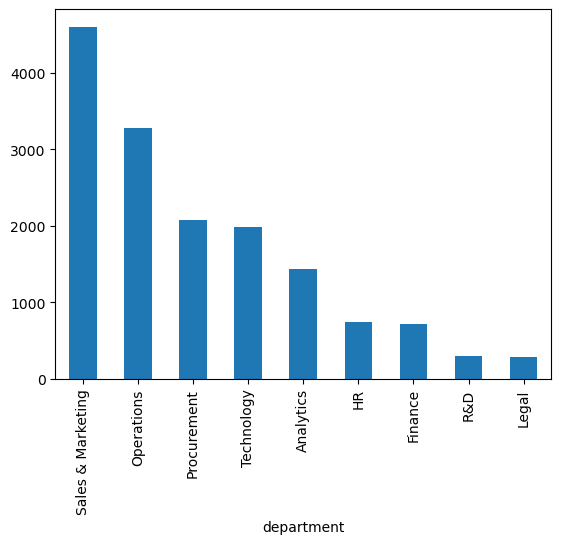

In [10]:
# plot department unique value count as a bar chart
data1['department'].value_counts().plot(kind='bar')

In [11]:
# determine the unique value count of education variable
data1['education'].value_counts()

education
Bachelors          10466
Masters & above     4790
Below Secondary      168
Name: count, dtype: int64

Most of the employees has a Bachelor degree as their highest education background

<Axes: ylabel='count'>

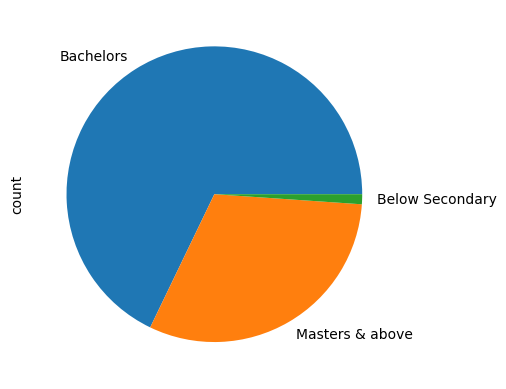

In [12]:
# plot education unique value count as a pie chart
data1['education'].value_counts().plot(kind='pie')

In [13]:
# determine the unique value count of gender variable
data1['gender'].value_counts()

gender
m    10813
f     4611
Name: count, dtype: int64

Most of the employees are male

<Axes: ylabel='count'>

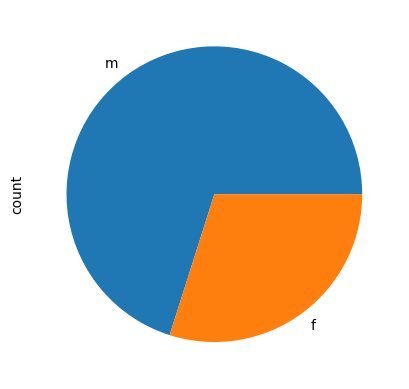

In [14]:
# plot department unique value count as a pie chart
data1['gender'].value_counts().plot(kind='pie')

In [15]:
# determine the unique value count of recruitment channel variable
data1['recruitment_channel'].value_counts()

recruitment_channel
other       8661
sourcing    6476
referred     287
Name: count, dtype: int64

Most of the employees are using other recruitment channels

<Axes: ylabel='count'>

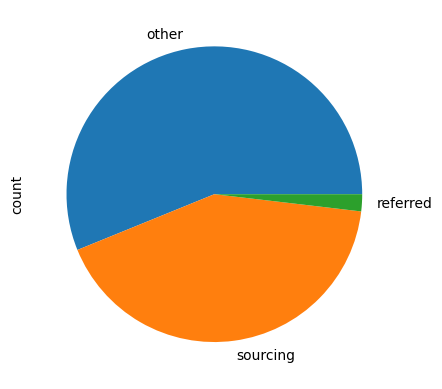

In [16]:
# plot department unique value count as a pie chart
data1['recruitment_channel'].value_counts().plot(kind='pie')

In [17]:
# determine the unique value count of number of trainings variable
data1['no_of_trainings'].value_counts()

no_of_trainings
1    12461
2     2350
3      453
4      115
5       24
6       12
7        5
8        2
9        2
Name: count, dtype: int64

Most of the employees has only receive 1 training in the workplace

<Axes: xlabel='no_of_trainings'>

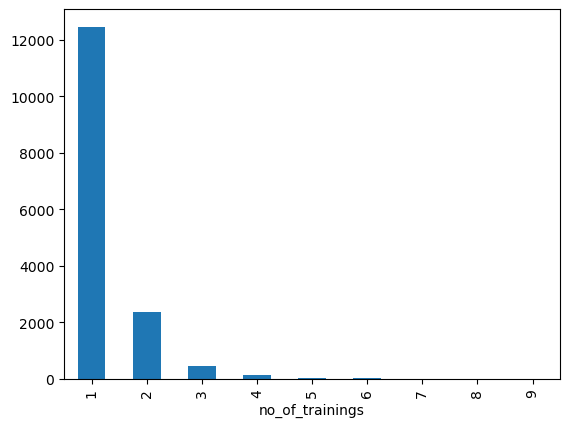

In [18]:
# # plot number of trainings unique value count as a bar chart
data1['no_of_trainings'].value_counts().plot(kind='bar')

In [19]:
# determine the unique value count of age variable
data1['age'].value_counts()

age
31    1050
30    1034
32    1020
33     991
34     917
29     858
35     844
36     757
28     754
37     673
27     628
38     607
39     556
40     490
26     451
41     421
42     330
43     319
44     259
25     250
45     222
46     200
47     182
49     173
48     159
50     149
52     129
51     118
53     117
24     111
54     102
55     102
56      84
58      75
60      68
57      60
59      57
23      57
22      20
20      20
21      10
Name: count, dtype: int64

<Axes: xlabel='age'>

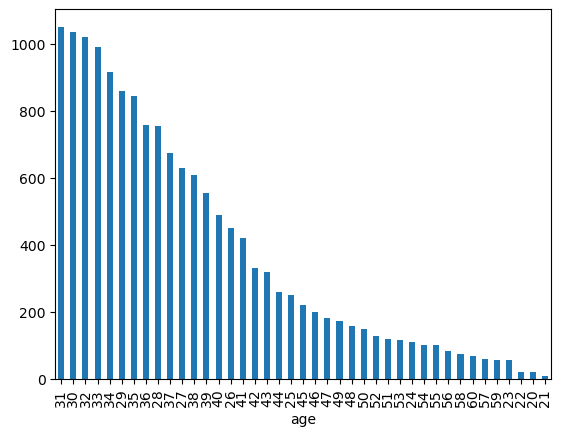

In [20]:
# determine the unique value count of department variable
data1['age'].value_counts().plot(kind='bar')

Most of the employees' age is around 30 to 32 years old

In [21]:
# checking data types of columns in the dataset
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15424 entries, 1 to 17416
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            15424 non-null  int64  
 1   department             15424 non-null  object 
 2   education              15424 non-null  object 
 3   gender                 15424 non-null  object 
 4   recruitment_channel    15424 non-null  object 
 5   no_of_trainings        15424 non-null  int64  
 6   age                    15424 non-null  int64  
 7   previous_year_rating   15424 non-null  float64
 8   length_of_service      15424 non-null  int64  
 9   KPIs_met_more_than_80  15424 non-null  int64  
 10  avg_training_score     15424 non-null  int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 1.4+ MB


Since the data types of the columns in the dataset already satisfy the researcher's intent, there is no need to replace the data types

In [22]:
# view the dataset
data1

,employee_id,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,avg_training_score
1,74430,HR,Bachelors,f,other,1,31,3.0,5,0,51
2,72255,Sales & Marketing,Bachelors,m,other,1,31,1.0,4,0,47
3,38562,Procurement,Bachelors,f,other,3,31,2.0,9,0,65
4,64486,Finance,Bachelors,m,sourcing,1,30,4.0,7,0,61
5,46232,Procurement,Bachelors,m,sourcing,1,36,3.0,2,0,68
...,...,...,...,...,...,...,...,...,...,...,...
17412,64573,Technology,Bachelors,f,referred,2,30,5.0,6,1,81
17413,49584,HR,Bachelors,m,other,1,33,1.0,9,0,51
17414,49584,HR,Bachelors,m,other,1,33,1.0,9,0,51
17415,49584,HR,Bachelors,m,other,1,33,1.0,9,0,51


## Descriptive

### Number of trainings

In [23]:
# measure the central tendencies (mean, median, mode) of number of trainings
mean1 = data1['no_of_trainings'].mean()
med1 = data1['no_of_trainings'].median()
mode1 = data1['no_of_trainings'].mode().values[0]

# print the mean, median, and mode of number of trainings
print(f"average of number of training: {mean1}")
print(f"median of number of training: {med1}")
print(f"mode of number of training: {mode1}")
print('\n')

# measure the dispersion (range, standard deviation, variance) of number of trainings
ran1 = data1['no_of_trainings'].max() - data1['no_of_trainings'].min()
std1 = data1['no_of_trainings'].std()
var1 = data1['no_of_trainings'].var()

# print the range, standard deviation, and variance of number of trainings
print(f"range of number of training: {ran1}")
print(f"standard deviation of number of training: {std1}")
print(f"variance of number of training: {var1}")
print('\n')

# measure the distribution (skewness and kurtosis) of number of trainings
skew1 = data1['no_of_trainings'].skew()
kur1 = data1['no_of_trainings'].kurtosis()

# print the range, standard deviation, and variance of number of trainings
print(f"skewness of number of training: {skew1}")
print(f"kurtosis of number of training: {kur1}")

average of number of training: 1.2474714730290457
median of number of training: 1.0
mode of number of training: 1


range of number of training: 8
standard deviation of number of training: 0.5885506286947728
variance of number of training: 0.34639184253701233


skewness of number of training: 3.405031583271848
kurtosis of number of training: 18.305736556043747


The data shows that the average employee only had 1.247 time training in the company, with the middle data point is 1 year, and most employees also only receive 1 time of company training.

As for the data distribution itself, it seems that the data is not normally distributed since it exceeds the range of -1 to 1 (at 3.405) which means that the data is highly and positively skewed. In addition, the kurtosis value is above 0 which means that it has leptokurtic shape of data distribution which indicated the existence of more outliers. In other words, if the data were to be graphed, it should show the data peak closer to the left with longer tail on the right as well as having higher peak and heavier tails.

### Age

In [24]:
# measure the central tendencies (mean, median, mode) of age
mean2 = data1['age'].mean()
med2 = data1['age'].median()
mode2 = data1['age'].mode().values[0]

# print the mean, median, and mode of age
print(f"average of age: {mean2}")
print(f"median of age: {med2}")
print(f"mode of age: {mode2}")
print('\n')

# measure the dispersion (range, standard deviation, variance) of age
ran2 = data1['age'].max() - data1['age'].min()
std2 = data1['age'].std()
var2 = data1['age'].var()

# print the range, standard deviation, and variance of age
print(f"range of age: {ran2}")
print(f"standard deviation of age: {std2}")
print(f"variance of age: {var2}")
print('\n')

# measure the distribution (skewness and kurtosis) of age
skew2 = data1['age'].skew()
kur2 = data1['age'].kurtosis()

# print the range, standard deviation, and variance of age
print(f"skewness of age: {skew2}")
print(f"kurtosis of age: {kur2}")

average of age: 35.63174273858921
median of age: 34.0
mode of age: 31


range of age: 40
standard deviation of age: 7.57675842855751
variance of age: 57.40726828471727


skewness of age: 0.992312974472415
kurtosis of age: 0.6909976463936345


The data shows that the average age of employee is about 35.6 years, with the middle data point is 34 years old, and most employees worked has the age of 31.

As for the data distribution itself, it seems that the data is in the range of -1 to 1 (at 0.99) which means that the data is moderately and positively skewed but not as skewed as the number of training. In addition, the kurtosis value is slightly above 0 which means that it has a slight leptokurtic shape of data distribution which indicated the existence of more outliers. In other words, if the data were to be graphed, it should show the data peak closer to the left with longer tail on the right as well as having higher peak and heavier tails.

### Previous Year Rating

In [25]:
# measure the central tendencies (mean, median, mode) of previous year rating
mean3 = data1['previous_year_rating'].mean()
med3 = data1['previous_year_rating'].median()
mode3 = data1['previous_year_rating'].mode().values[0]

# print the mean, median, and mode of previous year rating
print(f"average of previous year rating: {mean3}")
print(f"median of previous year rating: {med3}")
print(f"mode of previous year rating: {mode3}")
print('\n')

# measure the dispersion (range, standard deviation, variance) of previous year rating
ran3 = data1['previous_year_rating'].max() - data1['previous_year_rating'].min()
std3 = data1['previous_year_rating'].std()
var3 = data1['previous_year_rating'].var()

# print the range, standard deviation, and variance of previous year rating
print(f"range of previous year rating: {ran3}")
print(f"standard deviation of previous year rating: {std3}")
print(f"variance of previous year rating: {var3}")
print('\n')

# measure the distribution (skewness and kurtosis) of previous year rating
skew3 = data1['previous_year_rating'].skew()
kur3 = data1['previous_year_rating'].kurtosis()

# print the range, standard deviation, and variance of previous year rating
print(f"skewness of previous year rating: {skew3}")
print(f"kurtosis of previous year rating: {kur3}")

average of previous year rating: 3.35503112033195
median of previous year rating: 3.0
mode of previous year rating: 3.0


range of previous year rating: 4.0
standard deviation of previous year rating: 1.2639636864043198
variance of previous year rating: 1.5976042005487974


skewness of previous year rating: -0.3370593813220131
kurtosis of previous year rating: -0.7264496026329743


The data shows that the average employee had the rating of 3.355 out of 5 rating points in the previous year, with the middle data point is 3 rating point, and most employees also only had 3 rating point.

As for the data distribution itself, it seems that the data is normally distributed since it is within the range of -0.5 to 0.5 (at -0.337) which means the data distribution is approximately symmetrical. In addition, the kurtosis value is below 0 which means that it has platykurtic shape of data distribution which indicated the existence of less outliers. In other words, if the data were to be graphed, it should show the data peak closer to the middle as well as having flatter peak and lighter tails.

### Length of Service

In [26]:
# measure the central tendencies (mean, median, mode) of length of service
mean4 = data1['length_of_service'].mean()
med4 = data1['length_of_service'].median()
mode4 = data1['length_of_service'].mode().values[0]

# print the mean, median, and mode of length of service
print(f"average of length of service: {mean4}")
print(f"median of length of service: {med4}")
print(f"mode of length of service: {mode4}")
print('\n')

# measure the dispersion (range, standard deviation, variance) of length of service
ran4 = data1['length_of_service'].max() - data1['length_of_service'].min()
std4 = data1['length_of_service'].std()
var4 = data1['length_of_service'].var()

# print the range, standard deviation, and variance of length of service
print(f"range of length of service: {ran4}")
print(f"standard deviation of length of service: {std4}")
print(f"variance of length of service: {var4}")
print('\n')

# measure the distribution (skewness and kurtosis) of length of service
skew4 = data1['length_of_service'].skew()
kur4 = data1['length_of_service'].kurtosis()

# print the range, standard deviation, and variance of length of service
print(f"skewness of length of service: {skew4}")
print(f"kurtosis of length of service: {kur4}")

average of length of service: 6.258493257261411
median of length of service: 5.0
mode of length of service: 3


range of length of service: 33
standard deviation of length of service: 4.115781909479837
variance of length of service: 16.939660726401495


skewness of length of service: 1.750939024920984
kurtosis of length of service: 4.230282341057541


The data shows that the average employee had worked for the company for more than 6 years (6.26), with the middle data point is 5 years of service, and most employees worked there for about 3 years.

As for the data distribution itself, it seems that the data is not normally distributed since it exceeds the range of -1 to 1 (at 1.75) which means that the data is highly and positively skewed. In addition, the kurtosis value is above 0 which means that it has leptokurtic shape of data distribution which indicated the existence of more outliers. In other words, if the data were to be graphed, it should show the data peak closer to the left with longer tail on the right as well as having higher peak and heavier tails.

### Average Training Score

In [27]:
# measure the central tendencies (mean, median, mode) of average training score
mean5 = data1['avg_training_score'].mean()
med5 = data1['avg_training_score'].median()
mode5 = data1['avg_training_score'].mode().values[0]

# print the mean, median, and mode of average training score
print(f"average of average training score: {mean5}")
print(f"median of average training score: {med5}")
print(f"mode of average training score: {mode5}")
print('\n')

# measure the dispersion (range, standard deviation, variance) of average training score
ran5 = data1['avg_training_score'].max() - data1['avg_training_score'].min()
std5 = data1['avg_training_score'].std()
var5 = data1['avg_training_score'].var()

# print the range, standard deviation, and variance of average training score
print(f"range of average training score: {ran5}")
print(f"standard deviation of average training score: {std5}")
print(f"variance of average training score: {var5}")
print('\n')

# measure the distribution (skewness and kurtosis) of average training score
skew5 = data1['avg_training_score'].skew()
kur5 = data1['avg_training_score'].kurtosis()

# print the range, standard deviation, and variance of average training score
print(f"skewness of average training score: {skew5}")
print(f"kurtosis of average training score: {kur5}")

average of average training score: 63.36469139004149
median of average training score: 60.0
mode of average training score: 50


range of average training score: 60
standard deviation of average training score: 13.300695020670034
variance of average training score: 176.90848803287665


skewness of average training score: 0.4520094177595423
kurtosis of average training score: -1.020624957370955


The data shows that the average employee had the average training score of 63.36, with the middle data point is 60, and most employees had 50 as their average training score.

As for the data distribution itself, it seems that the data is normally distributed since it is within the range of -0.5 to 0.5 (at 0.45) which means the data distribution is approximately symmetrical. In addition, the kurtosis value is below 0 which means that it has platykurtic shape of data distribution which indicated the existence of less outliers. In other words, if the data were to be graphed, it should show the data peak closer to the middle as well as having flatter peak and lighter tails.

## Outliers and Extreme Values Analysis

### Number of Trainings

In [28]:
# finding the first quartile, third quartile, and interquartile range of number of trainings
q1_nt = data1['no_of_trainings'].quantile(0.25)
q3_nt = data1['no_of_trainings'].quantile(0.75)
iqr_nt = q3_nt - q1_nt

# finding the upper and lower boundaries of number of trainings using Tukey's Rule
up_nt = q3_nt + 1.5*iqr_nt
low_nt = q1_nt - 1.5*iqr_nt

# print the upper and lower boundaries of number of trainings
print(f'Upper Boundary: {up_nt:.2f}' )
print(f'Lower Boundary: {low_nt:.2f}')

Upper Boundary: 1.00
Lower Boundary: 1.00


In [29]:
# determine the range of outlier for number of trainings variable
outlier_nt = data1['no_of_trainings'][(data1['no_of_trainings']<low_nt) | (data1['no_of_trainings']>up_nt)]

# determine the range of not outlier for number of trainings variable
no_outlier_nt = data1['no_of_trainings'][(data1['no_of_trainings']>=low_nt) & (data1['no_of_trainings']<=up_nt)]

# print the proportion of outlier in the model
print(f'Percentage of outliers: {len(outlier_nt)*100/len(data1["no_of_trainings"]):.2f}%')

Percentage of outliers: 19.21%


<Axes: >

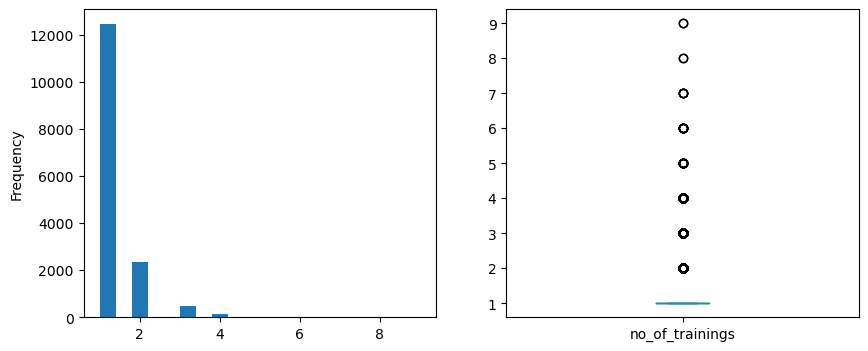

In [30]:
# create a histogram and boxplot for number of training with outliers
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

# create a histogram
data1['no_of_trainings'].plot(kind='hist',bins=20,ax=ax[0])

# create a box plot
data1['no_of_trainings'].plot(kind='box',ax=ax[1])

<Axes: >

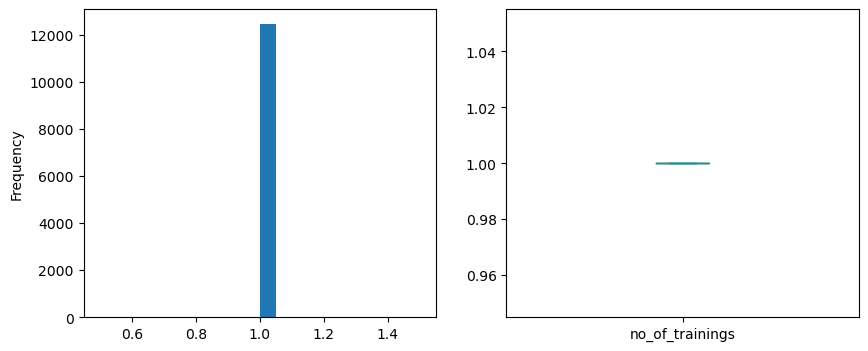

In [31]:
# create a histogram and boxplot for number of training without outliers
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

# create a histogram
no_outlier_nt.plot(kind='hist',bins=20,ax=ax[0])

# create a box plot
no_outlier_nt.plot(kind='box',ax=ax[1])

Since the data of number of training is not normally distributed, in order to measure the extreme values of the data, Tukey's Rule would be the more optimal method. The same upper and lower boundaries of this data indicated that the first and third quartiles of this data is consisted of 1 which means that the number of employees which had 1 year of training is far exceeds employees that had more than 1 trainings. These values tells us that if the number of trainings is above 1, it would be considered an outlier.

Since both boundaries have the same value, this research would not be able to remove the outlier in this dataset as it will eliminate other data points that did not have 1 as their values. As such, for this specific variable, the outlier would have to stay and there would be no 'no outlier' variation of data added to the dataframe.

The percentage of outliers in this particular case means that out of data that have 1 as their value, it made up about 19.21% of the population.

### Age

In [32]:
# finding the first quartile, third quartile, and interquartile range of age
q1_age = data1['age'].quantile(0.25)
q3_age = data1['age'].quantile(0.75)
iqr_age = q3_age - q1_age

# finding the upper and lower boundaries of age using Tukey's Rule
up_age = q3_age + 1.5*iqr_age
low_age = q1_age - 1.5*iqr_age

# print the upper and lower boundaries of age
print(f'Upper Boundary: {up_age:.2f}' )
print(f'Lower Boundary: {low_age:.2f}')

Upper Boundary: 52.50
Lower Boundary: 16.50


In [33]:
# determine the range of outlier for age variable
outlier_age = data1['age'][(data1['age']<low_age) | (data1['age']>up_age)]

# determine the range of not outlier for age variable
no_outlier_age = data1['age'][(data1['age']>=low_age) & (data1['age']<=up_age)]

# print the proportion of outlier in the model
print(f'Percentage of outliers: {len(outlier_age)*100/len(data1["age"]):.2f}%')

Percentage of outliers: 4.31%


In [34]:
# insert the no outlier data to the dataset
data1['age_no'] = no_outlier_age
data1

,employee_id,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,avg_training_score,age_no
1,74430,HR,Bachelors,f,other,1,31,3.0,5,0,51,31.0
2,72255,Sales & Marketing,Bachelors,m,other,1,31,1.0,4,0,47,31.0
3,38562,Procurement,Bachelors,f,other,3,31,2.0,9,0,65,31.0
4,64486,Finance,Bachelors,m,sourcing,1,30,4.0,7,0,61,30.0
5,46232,Procurement,Bachelors,m,sourcing,1,36,3.0,2,0,68,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17412,64573,Technology,Bachelors,f,referred,2,30,5.0,6,1,81,30.0
17413,49584,HR,Bachelors,m,other,1,33,1.0,9,0,51,33.0
17414,49584,HR,Bachelors,m,other,1,33,1.0,9,0,51,33.0
17415,49584,HR,Bachelors,m,other,1,33,1.0,9,0,51,33.0


<Axes: >

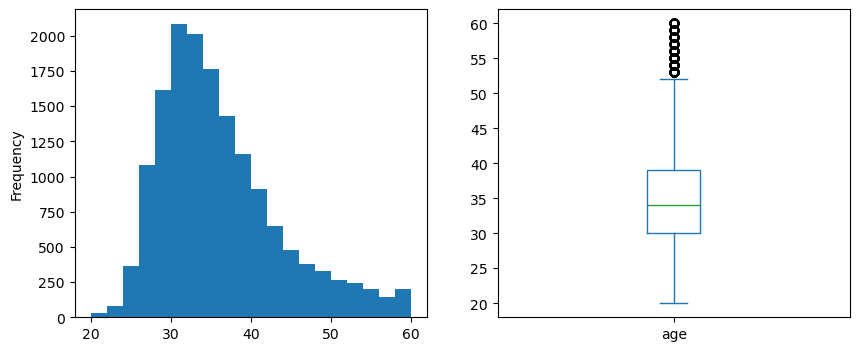

In [35]:
# create a histogram and boxplot for age with outliers
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

# create a histogram
data1['age'].plot(kind='hist',bins=20,ax=ax[0])

# create a boxplot
data1['age'].plot(kind='box',ax=ax[1])

<Axes: >

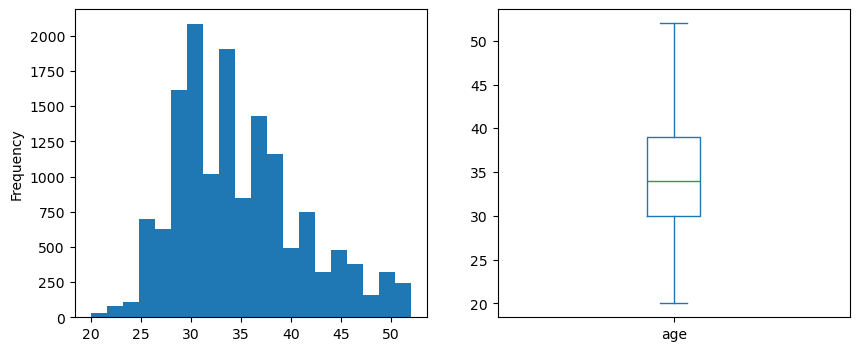

In [36]:
# create a histogram and boxplot for number of training without outliers
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

# create a histogram
no_outlier_age.plot(kind='hist',bins=20,ax=ax[0])

# create a boxplot
no_outlier_age.plot(kind='box',ax=ax[1])

Since the data of number of training is not normally distributed, in order to measure the extreme values of the data, Tukey's Rule would be the more optimal method. According to the result, any values of data that is below 16.5 or above 52.5 is considered as outliers. In this dataset, 4.31% of the population is consisted of outliers. The data distribution had also been fixed as after the outlier cleaning process as there are no data points outside the upper and lower boundaries.

After the removal of outliers, the data entries is reduced to 14,759 entries.

In [37]:
# finding the first quartile, third quartile, and interquartile range of previous year rating
avg_py = data1['previous_year_rating'].mean()
std_py = data1['previous_year_rating'].std()

# finding the upper and lower boundaries of previous year rating using Tukey's Rule
up_py = avg_py + 3*std_py
low_py = avg_py - 3*std_py

# print the upper and lower boundaries of previous year rating
print(f'Upper Boundary: {up_py:.2f}' )
print(f'Lower Boundary: {low_py:.2f}')

Upper Boundary: 7.15
Lower Boundary: -0.44


In [38]:
# determine the range of outlier for previous year rating variable
outlier_py = data1['previous_year_rating'][(data1['previous_year_rating']<low_py) | (data1['previous_year_rating']>up_py)]

# determine the range of not outlier for previous year rating variable
no_outlier_py = data1['previous_year_rating'][(data1['previous_year_rating']>=low_py) & (data1['previous_year_rating']<=up_py)]

# print the proportion of outlier in the model
print(f'Percentage of outliers: {len(outlier_py)*100/len(data1["previous_year_rating"]):.2f}%')

Percentage of outliers: 0.00%


In [39]:
# insert the no outlier data to the dataset
data1['previous_year_rating_no'] = no_outlier_py
data1

,employee_id,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,avg_training_score,age_no,previous_year_rating_no
1,74430,HR,Bachelors,f,other,1,31,3.0,5,0,51,31.0,3.0
2,72255,Sales & Marketing,Bachelors,m,other,1,31,1.0,4,0,47,31.0,1.0
3,38562,Procurement,Bachelors,f,other,3,31,2.0,9,0,65,31.0,2.0
4,64486,Finance,Bachelors,m,sourcing,1,30,4.0,7,0,61,30.0,4.0
5,46232,Procurement,Bachelors,m,sourcing,1,36,3.0,2,0,68,36.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17412,64573,Technology,Bachelors,f,referred,2,30,5.0,6,1,81,30.0,5.0
17413,49584,HR,Bachelors,m,other,1,33,1.0,9,0,51,33.0,1.0
17414,49584,HR,Bachelors,m,other,1,33,1.0,9,0,51,33.0,1.0
17415,49584,HR,Bachelors,m,other,1,33,1.0,9,0,51,33.0,1.0


<Axes: >

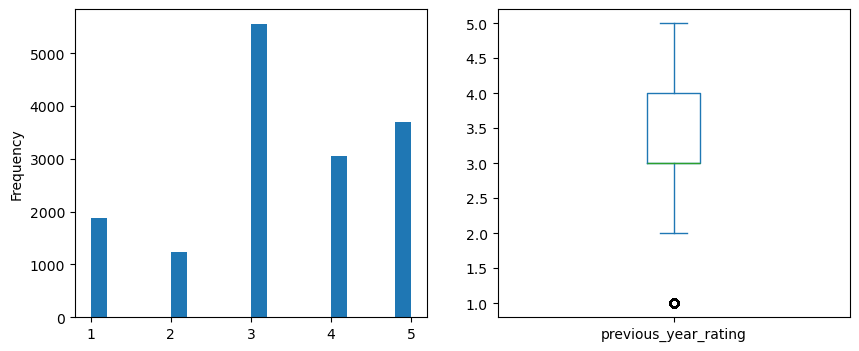

In [40]:
# create a histogram and boxplot for previous year rating with outliers
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

# create a histogram
data1['previous_year_rating'].plot(kind='hist',bins=20,ax=ax[0])

# create a boxplot
data1['previous_year_rating'].plot(kind='box',ax=ax[1])

<Axes: >

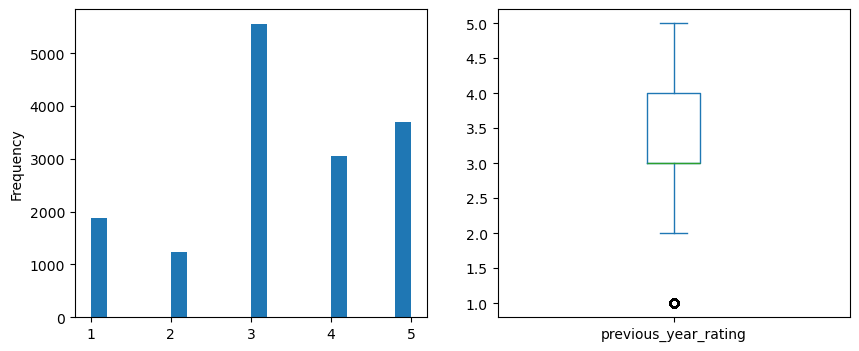

In [41]:
# create a histogram and boxplot for previous year rating without outliers
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

# create a histogram
no_outlier_py.plot(kind='hist',bins=20,ax=ax[0])

# create a boxplot
no_outlier_py.plot(kind='box',ax=ax[1])

Since the data of number of training is normally distributed, in order to measure the extreme values of the data, Using z-score would be the more optimal method. According to the result, any values of data that is below -0.44 or above 7.15 is considered as outliers. As such, there should not be any worry of outliers since the scale of year rating only ranges from 1 to 5. This is proven by the 0.00% outlier composition in the model. Hence, the histogram and box plot did not change before and after outlier cleaning process.

Since there are no data removed during outlier removing process, the data entries stays the same at 15,424 entries.

### Length of Service

In [42]:
# finding the first quartile, third quartile, and interquartile range of length of service
q1_ls = data1['length_of_service'].quantile(0.25)
q3_ls = data1['length_of_service'].quantile(0.75)
iqr_ls = q3_ls - q1_ls

# finding the upper and lower boundaries of length of service using Tukey's Rule
up_ls = q3_ls + 1.5*iqr_ls
low_ls = q1_ls - 1.5*iqr_ls

# print the upper and lower boundaries of length of service
print(f'Upper Boundary: {up_ls:.2f}' )
print(f'Lower Boundary: {low_ls:.2f}')

Upper Boundary: 15.50
Lower Boundary: -4.50


In [43]:
# determine the range of outlier for length of service variable
outlier_ls = data1['length_of_service'][(data1['length_of_service']<low_ls) | (data1['length_of_service']>up_ls)]

# determine the range of not outlier for length of service variable
no_outlier_ls = data1['length_of_service'][(data1['length_of_service']>=low_ls) & (data1['length_of_service']<=up_ls)]

# print the proportion of outlier in the model
print(f'Percentage of outliers: {len(outlier_ls)*100/len(data1["length_of_service"]):.2f}%')

Percentage of outliers: 4.59%


In [44]:
# insert the no outlier data to the dataset
data1['length_of_service_no'] = no_outlier_ls
data1

,employee_id,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,avg_training_score,age_no,previous_year_rating_no,length_of_service_no
1,74430,HR,Bachelors,f,other,1,31,3.0,5,0,51,31.0,3.0,5.0
2,72255,Sales & Marketing,Bachelors,m,other,1,31,1.0,4,0,47,31.0,1.0,4.0
3,38562,Procurement,Bachelors,f,other,3,31,2.0,9,0,65,31.0,2.0,9.0
4,64486,Finance,Bachelors,m,sourcing,1,30,4.0,7,0,61,30.0,4.0,7.0
5,46232,Procurement,Bachelors,m,sourcing,1,36,3.0,2,0,68,36.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17412,64573,Technology,Bachelors,f,referred,2,30,5.0,6,1,81,30.0,5.0,6.0
17413,49584,HR,Bachelors,m,other,1,33,1.0,9,0,51,33.0,1.0,9.0
17414,49584,HR,Bachelors,m,other,1,33,1.0,9,0,51,33.0,1.0,9.0
17415,49584,HR,Bachelors,m,other,1,33,1.0,9,0,51,33.0,1.0,9.0


<Axes: >

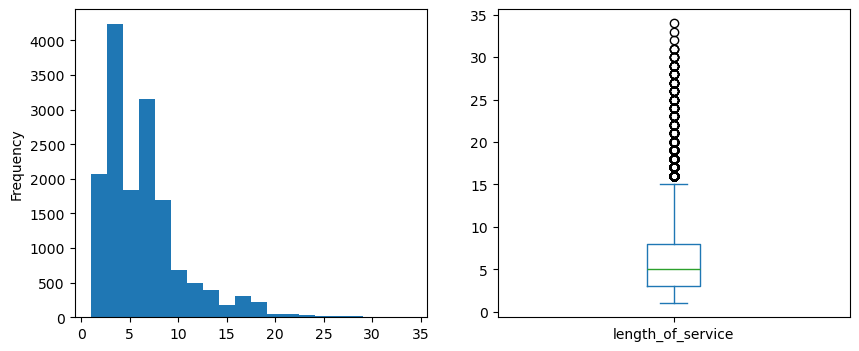

In [45]:
# create a histogram and boxplot for length of service with outliers
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

# create a histogram
data1['length_of_service'].plot(kind='hist',bins=20,ax=ax[0])

# create a box plot
data1['length_of_service'].plot(kind='box',ax=ax[1])

<Axes: >

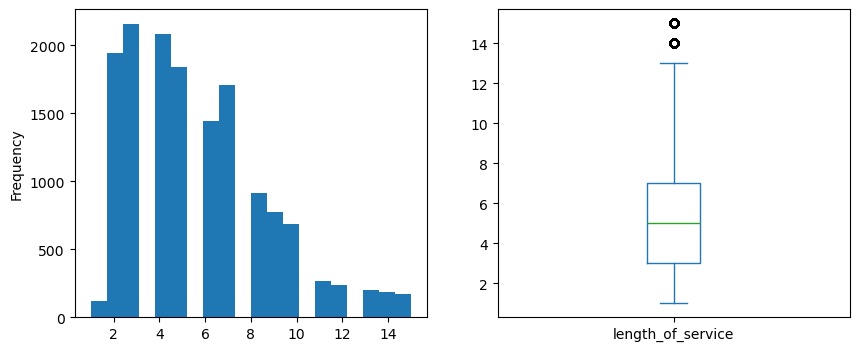

In [46]:
# create a histogram and boxplot for length of service without outliers
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

# create a histogram
no_outlier_ls.plot(kind='hist',bins=20,ax=ax[0])

# create a box plot
no_outlier_ls.plot(kind='box',ax=ax[1])

Since the data of number of training is not normally distributed, in order to measure the extreme values of the data, Tukey's Rule would be the more optimal method. According to the result, any values of data that is below -4.5 or above 15.5 is considered as outliers. In this dataset, 4.59% of the population is consisted of outliers. The data distribution had also been fixed as after the outlier cleaning process.

After the removal of outliers, the data entries is reduced to 14,716 entries.

### Average Training Score

In [47]:
# finding the first quartile, third quartile, and interquartile range of average training score
avg_ats = data1['avg_training_score'].mean()
std_ats = data1['avg_training_score'].std()

# finding the upper and lower boundaries of average training score using Tukey's Rule
up_ats = avg_ats + 3*std_ats
low_ats = avg_ats - 3*std_ats

# print the upper and lower boundaries of average training score
print(f'Upper Boundary: {up_ats:.2f}' )
print(f'Lower Boundary: {low_ats:.2f}')

Upper Boundary: 103.27
Lower Boundary: 23.46


In [48]:
# determine the range of outlier for average training score variable
outlier_ats = data1['avg_training_score'][(data1['avg_training_score']<low_ats) | (data1['avg_training_score']>up_ats)]

# determine the range of not outlier for average training score variable
no_outlier_ats = data1['avg_training_score'][(data1['avg_training_score']>=low_ats) & (data1['avg_training_score']<=up_ats)]

# print the proportion of outlier in the model
print(f'Percentage of outliers: {len(outlier_ats)*100/len(data1["avg_training_score"]):.2f}%')

Percentage of outliers: 0.00%


In [49]:
# insert the no outlier data to the dataset
data1['avg_training_score_no'] = no_outlier_ats
data1

,employee_id,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,avg_training_score,age_no,previous_year_rating_no,length_of_service_no,avg_training_score_no
1,74430,HR,Bachelors,f,other,1,31,3.0,5,0,51,31.0,3.0,5.0,51
2,72255,Sales & Marketing,Bachelors,m,other,1,31,1.0,4,0,47,31.0,1.0,4.0,47
3,38562,Procurement,Bachelors,f,other,3,31,2.0,9,0,65,31.0,2.0,9.0,65
4,64486,Finance,Bachelors,m,sourcing,1,30,4.0,7,0,61,30.0,4.0,7.0,61
5,46232,Procurement,Bachelors,m,sourcing,1,36,3.0,2,0,68,36.0,3.0,2.0,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17412,64573,Technology,Bachelors,f,referred,2,30,5.0,6,1,81,30.0,5.0,6.0,81
17413,49584,HR,Bachelors,m,other,1,33,1.0,9,0,51,33.0,1.0,9.0,51
17414,49584,HR,Bachelors,m,other,1,33,1.0,9,0,51,33.0,1.0,9.0,51
17415,49584,HR,Bachelors,m,other,1,33,1.0,9,0,51,33.0,1.0,9.0,51


<Axes: >

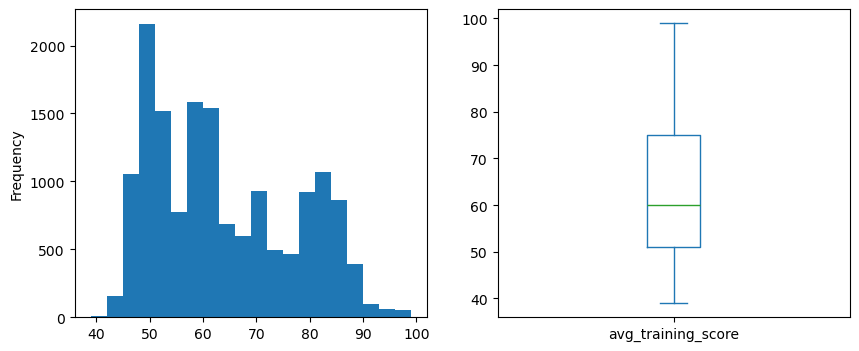

In [50]:
# create a histogram and boxplot for average training score with outliers
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

# create a histogram
data1['avg_training_score'].plot(kind='hist',bins=20,ax=ax[0])

# create a boxplot
data1['avg_training_score'].plot(kind='box',ax=ax[1])

<Axes: >

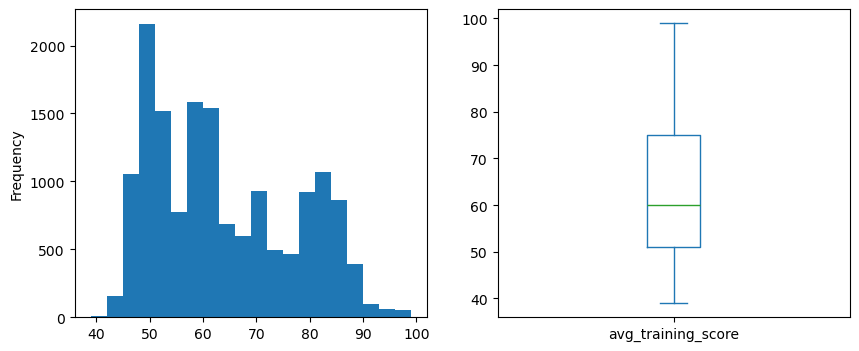

In [51]:
# create a histogram and boxplot for average training score without outliers
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

# create a histogram
no_outlier_ats.plot(kind='hist',bins=20,ax=ax[0])

# create a boxplot
no_outlier_ats.plot(kind='box',ax=ax[1])

Since the data of number of training is normally distributed, in order to measure the extreme values of the data, Using z-score would be the more optimal method. According to the result, any values of data that is below 23.46 or above 103.27 is considered as outliers. This is proven by the 0.00% outlier composition in the model. Hence, the histogram and box plot did not change before and after outlier cleaning process.

Since there are no data removed during outlier removing process, the data entries stays the same at 15,424 entries.

## Correlation

In [52]:
# check the dataset
data1

,employee_id,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,avg_training_score,age_no,previous_year_rating_no,length_of_service_no,avg_training_score_no
1,74430,HR,Bachelors,f,other,1,31,3.0,5,0,51,31.0,3.0,5.0,51
2,72255,Sales & Marketing,Bachelors,m,other,1,31,1.0,4,0,47,31.0,1.0,4.0,47
3,38562,Procurement,Bachelors,f,other,3,31,2.0,9,0,65,31.0,2.0,9.0,65
4,64486,Finance,Bachelors,m,sourcing,1,30,4.0,7,0,61,30.0,4.0,7.0,61
5,46232,Procurement,Bachelors,m,sourcing,1,36,3.0,2,0,68,36.0,3.0,2.0,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17412,64573,Technology,Bachelors,f,referred,2,30,5.0,6,1,81,30.0,5.0,6.0,81
17413,49584,HR,Bachelors,m,other,1,33,1.0,9,0,51,33.0,1.0,9.0,51
17414,49584,HR,Bachelors,m,other,1,33,1.0,9,0,51,33.0,1.0,9.0,51
17415,49584,HR,Bachelors,m,other,1,33,1.0,9,0,51,33.0,1.0,9.0,51


In [53]:
# create a function that could correlate a variable with 'KPIs_met_more_than_80' variable using pearson r method
def pval_pea(col):
    tmp = data1.groupby(col)[['KPIs_met_more_than_80']].mean().reset_index()
    r, p = stats.pearsonr(tmp[col],tmp['KPIs_met_more_than_80'])
    print('p-value:', p)

# create a function that could correlate a variable with 'KPIs_met_more_than_80' variable using kendall tau method
def pval_ken(col):
    tmp = data1.groupby(col)[['KPIs_met_more_than_80']].mean().reset_index()
    r, p = stats.kendalltau(tmp[col],tmp['KPIs_met_more_than_80'])
    print('p-value:', p)

In [54]:
# finding the p-value of number of trainings with KPI met more than 80 using pearson r method
pval_pea('no_of_trainings')

p-value: 0.9108222273650827


In [55]:
# create a new dataset consists of only number of training and KPIs met more than 80
data_trainingNum = data1[['no_of_trainings', 'KPIs_met_more_than_80']].copy()
data_trainingNum

,no_of_trainings,KPIs_met_more_than_80
1,1,0
2,1,0
3,3,0
4,1,0
5,1,0
...,...,...
17412,2,1
17413,1,0
17414,1,0
17415,1,0


In [56]:
# finding the correlation level using pearson method
data_trainingNum.corr(method='pearson')

,no_of_trainings,KPIs_met_more_than_80
no_of_trainings,1.000000,-0.046295
KPIs_met_more_than_80,-0.046295,1.000000


H0: the number of training that employees undergo has no impact on their performance

H1: the number of training that employees undergo has an impact on their performance

Since the p-value is above 0.05 at 0.91, the result fail to reject the null hypothesis, meaning that the number of training that employees undergo has no impact on their performance. This could indicate that the training provided by the company is not effective enough for employees to be more productive.

In [57]:
# finding the p-value of age with KPI met more than 80 using pearson r method
pval_pea('age_no')

p-value: 0.010653581993496513


In [58]:
# create a new dataset consists of only age and KPIs met more than 80
data_age = data1[['age', 'KPIs_met_more_than_80']].copy()
data_age

,age,KPIs_met_more_than_80
1,31,0
2,31,0
3,31,0
4,30,0
5,36,0
...,...,...
17412,30,1
17413,33,0
17414,33,0
17415,33,0


In [59]:
# find the correlation level using pearson method
data_age.corr(method='pearson')

,age,KPIs_met_more_than_80
age,1.000000,-0.030967
KPIs_met_more_than_80,-0.030967,1.000000


H0: the age of employees has no impact on their performance

H1: the age of employees has an impact on their performance

Since the p-value is below 0.05 at 0.01, the result rejected the null hypothesis, meaning that age do have an impact on a worker's performance.

By conducting the pearson correlation method, age has shown to have a negative correlation with performance, albeit low. This means that while increase of age might reduce the performance of an employee, the impact should not be felt significantly.

In [60]:
# finding the p-value of previous year rating with KPI met more than 80 using kendall tau method
pval_ken('previous_year_rating_no')

p-value: 0.016666666666666666


In [61]:
# create a new dataset consists of only previous_year_rating_no and KPIs met more than 80
data_prevYear = data1[['previous_year_rating_no', 'KPIs_met_more_than_80']].copy()
data_prevYear

,previous_year_rating_no,KPIs_met_more_than_80
1,3.0,0
2,1.0,0
3,2.0,0
4,4.0,0
5,3.0,0
...,...,...
17412,5.0,1
17413,1.0,0
17414,1.0,0
17415,1.0,0


In [62]:
# find the correlation level using kendall method
data_prevYear.corr(method='kendall')

,previous_year_rating_no,KPIs_met_more_than_80
previous_year_rating_no,1.000000,0.318436
KPIs_met_more_than_80,0.318436,1.000000


H0: the employee's rating from previous year has no impact on their performance

H1: the employee's rating from previous year has an impact on their performance

Since the p-value is below 0.05 at 0.016, the result rejected the null hypothesis, meaning that previous year rating do have an impact on an employee's performance.

By conducting the kendall correlation method, age has shown to have a significant positive correlation with performance. This means that the higher the rating of that employee in the previous year, it is more likely for them to have high performance in this year. This could indicate that the employee has a year-on-year consistency in performance.

In [63]:
# finding the p-value of length of service with KPI met more than 80 using pearson r method
pval_pea('length_of_service_no')

p-value: 5.094489736848207e-07


In [64]:
# create a new dataset consists of only length_of_service_no and KPIs met more than 80
data_serviceYears = data1[['length_of_service_no', 'KPIs_met_more_than_80']].copy()
data_serviceYears

,length_of_service_no,KPIs_met_more_than_80
1,5.0,0
2,4.0,0
3,9.0,0
4,7.0,0
5,2.0,0
...,...,...
17412,6.0,1
17413,9.0,0
17414,9.0,0
17415,9.0,0


In [65]:
# find the correlation level using pearson method
data_serviceYears.corr(method='pearson')

,length_of_service_no,KPIs_met_more_than_80
length_of_service_no,1.000000,-0.078858
KPIs_met_more_than_80,-0.078858,1.000000


H0: the amount of years worked (work experience) by employees has no impact on their performance

H1: the amount of years worked (work experience) by employees has an impact on their performance

Since the p-value is below 0.05 at 5.094489736848207e-07, the result rejected the null hypothesis, meaning that work experience do have an impact on an employee's performance.

However, by conducting the pearson correlation method, age has shown to have a negative correlation with performance, albeit low. This means that the higher work experience that an employee has, their performance tend to decline, but the impact should not be felt significantly.

In [66]:
# finding the p-value of average training score with KPI met more than 80 using pearson r method
pval_pea('avg_training_score_no')

p-value: 6.016670137279199e-11


In [67]:
# create a new dataset consists of only avg_training_score_no and KPIs met more than 80
data_trainingScore = data1[['avg_training_score_no', 'KPIs_met_more_than_80']].copy()
data_trainingScore

,avg_training_score_no,KPIs_met_more_than_80
1,51,0
2,47,0
3,65,0
4,61,0
5,68,0
...,...,...
17412,81,1
17413,51,0
17414,51,0
17415,51,0


In [68]:
# finding the p-value of age with KPI met more than 80 using pearson r method
data_trainingScore.corr(method='pearson')

,avg_training_score_no,KPIs_met_more_than_80
avg_training_score_no,1.000000,0.059939
KPIs_met_more_than_80,0.059939,1.000000


H0: the average training score that employees have has no impact on their performance

H1: the average training score that employees have has an impact on their performance

Since the p-value is below 0.05 at 6.016670137279199e-11, the result rejected the null hypothesis, meaning that the average score of training by employees tend to have an influence on their performance.

Although that might be the case, by conducting the pearson correlation method, the result shows that average training score has a low and positive correlation. This means that even though it has a positive impact on the performance, the impact should not be felt significantly.

In [69]:
# checking unique values of department
data1['department'].value_counts()

department
Sales & Marketing    4601
Operations           3284
Procurement          2077
Technology           1984
Analytics            1436
HR                    740
Finance               716
R&D                   299
Legal                 287
Name: count, dtype: int64

In [70]:
# extracting data of employees in each department as well as their ability to achieve KPI more than 80 or not
hrd = data1['KPIs_met_more_than_80'][(data1['department']=='HR')]
snm = data1['KPIs_met_more_than_80'][(data1['department']=='Sales & Marketing')]
pro = data1['KPIs_met_more_than_80'][(data1['department']=='Procurement')]
fin = data1['KPIs_met_more_than_80'][(data1['department']=='Finance')]
ana = data1['KPIs_met_more_than_80'][(data1['department']=='Analytics')]
tec = data1['KPIs_met_more_than_80'][(data1['department']=='Technology')]
ope = data1['KPIs_met_more_than_80'][(data1['department']=='Operations')]
leg = data1['KPIs_met_more_than_80'][(data1['department']=='Legal')]
rnd = data1['KPIs_met_more_than_80'][(data1['department']=='R&D')]

In [71]:
# since the data is only consisted of 0 and 1, finding the sum of each department could ultimately find the amount of employees that have achieve KPI over 80
# printing the result of amount of employees in each department that are able to achieve KPI more than 80
print(f'The amount of HR department employees that has achieved KPI more than 80: {hrd.sum()} employees')
print(f'The amount of Sales and Marketing department employees that has achieved KPI more than 80: {snm.sum()} employees')
print(f'The amount of Procurement department employees that has achieved KPI more than 80: {pro.sum()} employees')
print(f'The amount of Finance department employees that has achieved KPI more than 80: {fin.sum()} employees')
print(f'The amount of Analytics department employees that has achieved KPI more than 80: {ana.sum()} employees')
print(f'The amount of Technology department employees that has achieved KPI more than 80: {tec.sum()} employees')
print(f'The amount of Operations department employees that has achieved KPI more than 80: {ope.sum()} employees')
print(f'The amount of Legal department employees that has achieved KPI more than 80: {leg.sum()} employees')
print(f'The amount of R&D department employees that has achieved KPI more than 80: {rnd.sum()} employees')

The amount of HR department employees that has achieved KPI more than 80: 270 employees
The amount of Sales and Marketing department employees that has achieved KPI more than 80: 1309 employees
The amount of Procurement department employees that has achieved KPI more than 80: 775 employees
The amount of Finance department employees that has achieved KPI more than 80: 286 employees
The amount of Analytics department employees that has achieved KPI more than 80: 562 employees
The amount of Technology department employees that has achieved KPI more than 80: 689 employees
The amount of Operations department employees that has achieved KPI more than 80: 1453 employees
The amount of Legal department employees that has achieved KPI more than 80: 95 employees
The amount of R&D department employees that has achieved KPI more than 80: 137 employees


According to the analysis, it seems that employees it seems that employees in Operation and Sales and Department are the most productive at 1,453 and 1,309 employees respectively. However, this did not take into account the fact that the amount of employees with in those two departments are the highest compared to other departments. Therefore, calculating the proportion instead of the nominal value should be better to measure the productivity of each educational level.

In [72]:
# since the data is only consisted of 0 and 1, finding the mean of each department could ultimately find the proportion of employees that have achieve KPI over 80
# printing the result of proportion of employees in each department that are able to achieve KPI more than 80
print(f'The proportion of HR department employees that has achieved KPI more than 80: {hrd.mean()*100:.2f}%')
print(f'The proportion of Sales and Marketing department employees that has achieved KPI more than 80: {snm.mean()*100:.2f}%')
print(f'The proportion of Procurement department employees that has achieved KPI more than 80: {pro.mean()*100:.2f}%')
print(f'The proportion of Finance department employees that has achieved KPI more than 80: {fin.mean()*100:.2f}%')
print(f'The proportion of Analytics department employees that has achieved KPI more than 80: {ana.mean()*100:.2f}%')
print(f'The proportion of Technology department employees that has achieved KPI more than 80: {tec.mean()*100:.2f}%')
print(f'The proportion of Operations department employees that has achieved KPI more than 80: {ope.mean()*100:.2f}%')
print(f'The proportion of Legal department employees that has achieved KPI more than 80: {leg.mean()*100:.2f}%')
print(f'The proportion of R&D department employees that has achieved KPI more than 80: {rnd.mean()*100:.2f}%')

The proportion of HR department employees that has achieved KPI more than 80: 36.49%
The proportion of Sales and Marketing department employees that has achieved KPI more than 80: 28.45%
The proportion of Procurement department employees that has achieved KPI more than 80: 37.31%
The proportion of Finance department employees that has achieved KPI more than 80: 39.94%
The proportion of Analytics department employees that has achieved KPI more than 80: 39.14%
The proportion of Technology department employees that has achieved KPI more than 80: 34.73%
The proportion of Operations department employees that has achieved KPI more than 80: 44.24%
The proportion of Legal department employees that has achieved KPI more than 80: 33.10%
The proportion of R&D department employees that has achieved KPI more than 80: 45.82%


According to the analysis, it seems that Research and Development (R&D) department is considered as the most productive when compared to other departments with 45.82% of all employees in this department of its employees managed to achieve KPI above 80. The close second place is Operation department with 44.24% of its employees are considered highly productive and managed to achieve the same threshold of KPI. Meanwhile, the Sales and Marketing Department is considered the least productive with only 28.45% of its employees had achieved KPI over 80.

In [73]:
# Finding the p-value of department using ANOVA method
dep_pval = stats.f_oneway(hrd, snm, pro, fin, ana, tec, ope, leg, rnd)
print('P-value:',dep_pval.pvalue)

P-value: 2.9880583811198213e-47


H0: There is no significant difference between the performance of each department

H1: There is a significant difference between the performance of each department

Since the p-value of department is below 0.05 (at 2.9880583811198213e-47), it rejected the H0 which means that there is a significant difference between the performance of each department.

In [74]:
# checking unique values of education
data1['education'].value_counts()

education
Bachelors          10466
Masters & above     4790
Below Secondary      168
Name: count, dtype: int64

In [75]:
# extracting data of employees of each educational background as well as their ability to achieve KPI more than 80 or not
bac = data1['KPIs_met_more_than_80'][(data1['education']=='Bachelors')]
mas = data1['KPIs_met_more_than_80'][(data1['education']=='Masters & above')]
bel = data1['KPIs_met_more_than_80'][(data1['education']=='Below Secondary')]

In [76]:
# since the data is only consisted of 0 and 1, finding the sum of each educational background could ultimately find the amount of employees that have achieve KPI over 80
# printing the result of amount of employees in each educational background that are able to achieve KPI more than 80
print(f'The amount of employees with bachelor degrees that has achieved KPI more than 80: {bac.sum()} employees')
print(f'The amount of employees with master and above degrees that has achieved KPI more than 80: {mas.sum()} employees')
print(f'The amount of employees with below secondary education level that has achieved KPI more than 80: {bel.sum()} employees')

The amount of employees with bachelor degrees that has achieved KPI more than 80: 3743 employees
The amount of employees with master and above degrees that has achieved KPI more than 80: 1759 employees
The amount of employees with below secondary education level that has achieved KPI more than 80: 74 employees


According to the analysis, it seems that employees with bachelor degrees is the most productive at 3,743 employees. However, this did not take into account the fact that the amount of employees with bachelor degrees is above 10,000 people whereas employees with master and above, and below secondary are only 4,790 and 168 respectively. Therefore, calculating the proportion instead of the nominal value should be better to measure the productivity of each educational level.

In [77]:
# since the data is only consisted of 0 and 1, finding the mean of each education could ultimately find the proportion of employees that have achieve KPI over 80
# printing the result of proportion of employees in each educational background that are able to achieve KPI more than 80
print(f'The proportion of employees with bachelor degrees that has achieved KPI more than 80: {bac.mean()*100:.2f}%')
print(f'The proportion of employees with master and above degrees that has achieved KPI more than 80: {mas.mean()*100:.2f}%')
print(f'The proportion of employees with below secondary education level that has achieved KPI more than 80: {bel.mean()*100:.2f}%')

The proportion of employees with bachelor degrees that has achieved KPI more than 80: 35.76%
The proportion of employees with master and above degrees that has achieved KPI more than 80: 36.72%
The proportion of employees with below secondary education level that has achieved KPI more than 80: 44.05%


According to the analysis, it seems that employees without degree and only have below secondary education level is considered the most productive with the proportion of 44.05% out of all employees with the same education level achieved the KPI of over 80. Followed by employees with master and above degrees with 36.72% and lastly employees with bachelor degrees with 35.76% of employees managed to reach KPI of over 80.

In [78]:
# Finding the p-value of education using ANOVA method
edu_pval = stats.f_oneway(bac, mas, bel)
print('P-value:',edu_pval.pvalue)

P-value: 0.0524178823037373


H0: There is no significant difference between the performance of each education level

H1: There is a significant difference between the performance of each education level

Since the p-value of department is slightly above 0.05 (at 0.0524178823037373), it failed to reject the H0 which means that there is no significant difference between the performance of each education level.

In [79]:
# checking unique values of recruitment channel
data1['recruitment_channel'].value_counts()

recruitment_channel
other       8661
sourcing    6476
referred     287
Name: count, dtype: int64

In [80]:
# extracting data of employees of each recruitment channel as well as their ability to achieve KPI more than 80 or not
sou = data1['KPIs_met_more_than_80'][(data1['recruitment_channel']=='sourcing')]
ref = data1['KPIs_met_more_than_80'][(data1['recruitment_channel']=='referred')]
oth = data1['KPIs_met_more_than_80'][(data1['recruitment_channel']=='other')]

In [81]:
# since the data is only consisted of 0 and 1, finding the sum of each education could ultimately find the amount of employees that have achieve KPI over 80
# printing the result of proportion of employees in each recruitment channel that are able to achieve KPI more than 80
print(f'The amount of employees from sourcing recruitment channel that has achieved KPI more than 80: {sou.sum()}')
print(f'The amount of employees from referral recruitment channel that has achieved KPI more than 80: {ref.sum()}')
print(f'The amount of employees with from other recruitment channels that has achieved KPI more than 80: {oth.sum()}')

The amount of employees from sourcing recruitment channel that has achieved KPI more than 80: 2331
The amount of employees from referral recruitment channel that has achieved KPI more than 80: 160
The amount of employees with from other recruitment channels that has achieved KPI more than 80: 3085


According to the analysis, it seems that employees from sourcing channel is the most productive at 2,331 employees. However, this did not take into account the fact that there are a big disparity in nominal amount of employees from these sources. Therefore, calculating the proportion instead of the nominal value should be better to measure the productivity of each educational level.

In [82]:
# since the data is only consisted of 0 and 1, finding the mean of each education could ultimately find the proportion of employees that have achieve KPI over 80
# printing the result of proportion of employees in each recruitment channel that are able to achieve KPI more than 80
print(f'The proportion of employees from sourcing recruitment channel that has achieved KPI more than 80: {sou.mean()*100:.2f}%')
print(f'The proportion of employees from referral recruitment channel that has achieved KPI more than 80: {ref.mean()*100:.2f}%')
print(f'The proportion of employees with from other recruitment channels that has achieved KPI more than 80: {oth.mean()*100:.2f}%')

The proportion of employees from sourcing recruitment channel that has achieved KPI more than 80: 35.99%
The proportion of employees from referral recruitment channel that has achieved KPI more than 80: 55.75%
The proportion of employees with from other recruitment channels that has achieved KPI more than 80: 35.62%


According to the analysis, it seems that employees from referral sources is considered the most productive with the proportion of 55.75% out of all employees with the same recruitment source achieved the KPI of over 80. Followed by employees with sourcing and other recruitment channels with 35.99% and 35.62% respectively.

In [83]:
# Finding the p-value of recruitment channel using ANOVA method
rec_pval = stats.f_oneway(sou, ref, oth)
print('P-value:',rec_pval.pvalue)

P-value: 2.3432581287756122e-11


H0: There is no significant difference between the performance of each recruitment channel

H1: There is a significant difference between the performance of each recruitment channel

Since the p-value of department is slightly above 0.05 (at 2.3432581287756122e-11), it rejected the H0 which means that there is a significant difference between the performance of each recruitment channel.

## Summary and Insights:
Using 5 indicators that could have an impact on employees performance to be put under correlation analysis, there are several interesting results. The only positive and significant factor of performance is the rating of employee in their previous year on their current performance. This could indicate that workers that have a good performance in last year tend to show the same consistency in this year. Another interesting piece of information of this analysis is how productive each department is. Proportionally, the Research and Development (R&D) department is considered as the most productive with the close second place of Operation department.

Since the company's employees have different educational background, it would be interesting to see which education level has the highest productivity in the company. Surprisingly, employees without bachelor and/or master and above degrees has the highest productivity compared to those with bachelors or masters and above degree. This could indicate that higher educational background does not necessarily mean that that person would be productive in the company. Additionally, using the right recruitment channel is important in determining whether that employee would be productive or not. Employees recruited from referral recruitment channel achieve highest productivity, significantly above others.

In conclusion, judging by the result, the company should prioritize in giving incentives for employees that have high performance because they tend to repeat and/or improve their performance in the following year rather than other things such as increasing the number of training. Additionally, should the company decided to reduce the number of employee in the company, it would be wise to consider those who are older and more experienced since according to this research, they tend to show worse performance. By comparing each department and their productivity, it seems like Research and Development department is the most productive in the company. Last piece of insight that this research might tell is that the higher education level does not necessarily mean higher productivity. As such, should the company wanted to recruit a new employee, educational background should not be the only priority in mind.

In [84]:
# export the final dataset as a .csv file to be processed in tableau public
data1.to_csv('employee_performance_tracker.csv', index=False)